In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('tfcc_top_20_summaries_of_summaries_cohere.csv')

In [3]:
# Group themes by topic_name
grouped = df.groupby('topic_name')['theme'].apply(list)

# Convert the grouped Series back to a DataFrame
grouped_df = grouped.reset_index()

In [4]:
# Remove specified characters from the 'theme' column in 'grouped_df'
def remove_chars(theme_list):
    return [theme.translate(str.maketrans("", "", "[],.")) for theme in theme_list]

grouped_df['theme'] = grouped_df['theme'].apply(remove_chars)

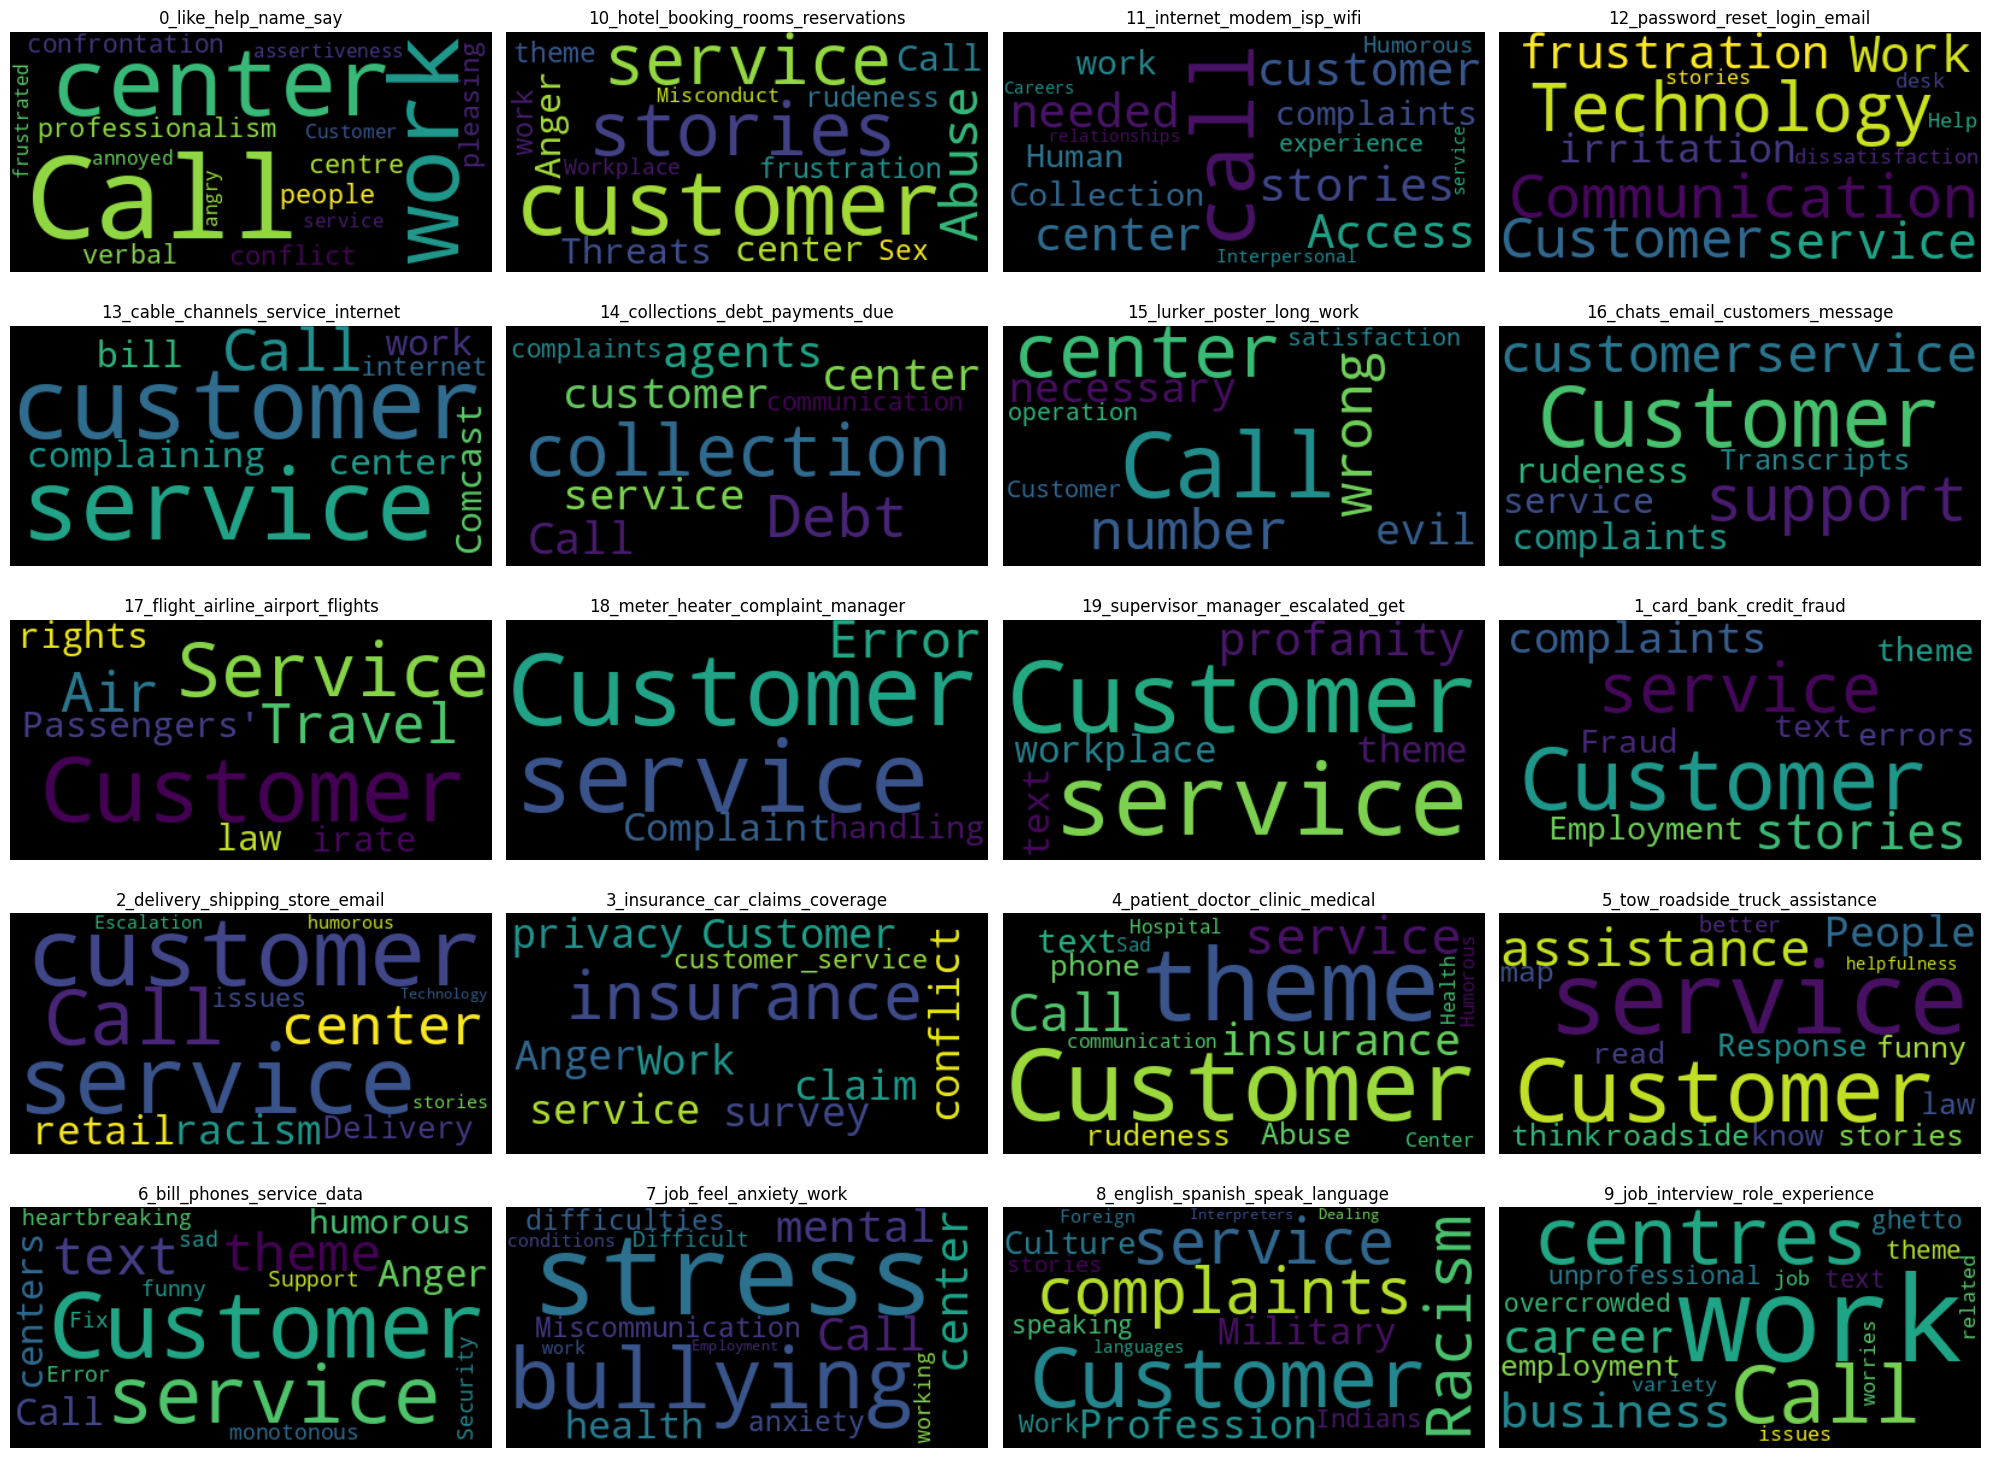

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already grouped the themes by topic_name in 'grouped_df'

# Sort the grouped_df DataFrame by 'topic_name'
grouped_df = grouped_df.sort_values(by='topic_name')

# Calculate the grid dimensions based on the number of unique topics
import numpy as np
num_topics = grouped_df['topic_name'].nunique()
grid_dim = (int(np.ceil(np.sqrt(num_topics))), int(np.ceil(num_topics / np.ceil(np.sqrt(num_topics)))))

# Create the word cloud plot
fig, ax = plt.subplots(*grid_dim, figsize=(20, 15))
ax = ax.ravel()

for i, (topic_name, theme) in enumerate(zip(grouped_df['topic_name'], grouped_df['theme'])):
    # Join the list of themes into a single string for wordcloud generation
    theme_str = ', '.join(theme)
    
    wordcloud = WordCloud(width=400, height=200).generate(theme_str)
    ax[i].imshow(wordcloud, interpolation='bilinear')
    ax[i].axis('off')
    ax[i].set_title(topic_name)

# Remove extra subplots if the number of topics is less than the grid size
for i in range(num_topics, len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()








